### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia.  

The company is looking at prospective properties to buy to enter the market.

Required to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.

 
The company wants to know:
    - Which variables are significant in predicting the price of a house
    - How well those variables describe the price of a house
    - Also, determine the optimal value of lambda for ridge and lasso regression.

### Import Required Libraries

In [1]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

### Step-1: Import and inspect data frame

In [2]:
# Importing data set
ds = pd.read_csv(r'..\UpGrad_Study\train.csv')
ds.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
# Check the names of columns
ds.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# Checking the information of the dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
#Check the descriptive statistics
ds.describe().transpose()

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [10]:
# Check the shape of the dataset
ds.shape

(1460, 81)

#### 1.1 Data Preparation

Let's now conduct some data cleaning steps. 

In [11]:
# evaluating the percenatage of na values in columns having na valuesbChecking the percentage of missing values
round(100*(ds.loc[:, ds.isnull().any()].isnull().sum()/len(ds.index)), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

**1.1.1 Null Value Treatment**

Instead of dropping the null values which will result in a data loss, we will impute the null values according to the domain understanding and the data dictionary provided with the data.

In [12]:
# data distribution in Alley column
ds['Alley'].astype('category').value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [13]:
# data distribution in MasVnrType column
ds['MasVnrType'].astype('category').value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [14]:
# data distribution in BsmtQual column
ds['BsmtQual'].astype('category').value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [15]:
# data distribution in BsmtCond column
ds['BsmtCond'].astype('category').value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [16]:
# data distribution in BsmtExposure column
ds['BsmtExposure'].astype('category').value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [17]:
# data distribution in BsmtFinType1 column
ds['BsmtFinType1'].astype('category').value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [18]:
# data distribution in BsmtFinType2 column
ds['BsmtFinType2'].astype('category').value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [19]:
# data distribution in FireplaceQu column
ds['FireplaceQu'].astype('category').value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [20]:
# data distribution in GarageType column
ds['GarageType'].astype('category').value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [21]:
# data distribution in GarageFinish column
ds['GarageFinish'].astype('category').value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [22]:
# data distribution in GarageQual column
ds['GarageQual'].astype('category').value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [23]:
# data distribution in GarageCond column
ds['GarageCond'].astype('category').value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [24]:
# data distribution in PoolQC column
ds['PoolQC'].astype('category').value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [25]:
# data distribution in Fence column
ds['Fence'].astype('category').value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [26]:
# data distribution in MiscFeature column
ds['MiscFeature'].astype('category').value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [27]:
# data distribution in Electrical column
ds['Electrical'].astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [28]:
#Imputing values by looking at the data dictionary provided to us 
#and data distribution across different columns

# based on data dictionary na in Alley means 'No alley access'
ds.loc[ds['Alley'].isnull(),['Alley']] = 'No alley access'
# LotFrontage can never be 0. So imputing it with mean value
ds.loc[ds['LotFrontage'].isnull(),['LotFrontage']] = ds['LotFrontage'].median()
# based on data dictionary na in MasVnrType means 'none'
ds.loc[ds['MasVnrType'].isnull(),['MasVnrType']] = 'none'
# based on data dictionary where MasVnrType type is 'none' area will 0
ds.loc[ds['MasVnrArea'].isnull(),['MasVnrArea']] = 0
# based on data dictionary na in BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 means ''No Basement'
ds.loc[ds['BsmtQual'].isnull(),['BsmtQual']] = 'No Basement'
ds.loc[ds['BsmtCond'].isnull(),['BsmtCond']] = 'No Basement'
ds.loc[ds['BsmtExposure'].isnull(),['BsmtExposure']] = "No Basement"
ds.loc[ds['BsmtFinType1'].isnull(),['BsmtFinType1']] = 'No Basement'
ds.loc[ds['BsmtFinType2'].isnull(),['BsmtFinType2']] = 'No Basement'
# based on data dictionary na in FireplaceQu means 'No Fireplace'
ds.loc[ds['FireplaceQu'].isnull(),['FireplaceQu']] = 'No Fireplace'
# based on data dictionary na in GarageType,GarageFinish,GarageQual,GarageCond means 'No Garage'
ds.loc[ds['GarageType'].isnull(),['GarageType']] = 'No Garage'
ds.loc[ds['GarageFinish'].isnull(),['GarageFinish']] = 'No Garage'
ds.loc[ds['GarageQual'].isnull(),['GarageQual']] = 'No Garage'
ds.loc[ds['GarageCond'].isnull(),['GarageCond']] = 'No Garage'
# based on data dictionary na in PoolQC means 'No Pool'
ds.loc[ds['PoolQC'].isnull(),['PoolQC']] = 'No Pool'
# based on data dictionary na in Fence means 'No Fence'
ds.loc[ds['Fence'].isnull(),['Fence']] = 'No Fence'
# based on data dictionary na in MiscFeature means 'none'
ds.loc[ds['MiscFeature'].isnull(),['MiscFeature']] = 'none'
# impute GarageYrBlt with 2020so that while calculating age it will it will turn to 0
ds.loc[ds['GarageYrBlt'].isnull(),['GarageYrBlt']] = 2020
# impute electrical column with SBrkr as it is the most occuring value
ds.loc[ds['Electrical'].isnull(),['Electrical']] = "SBrkr"

In [29]:
## Let's check percentage of null values again after imputation
# You won't see any data now as all the columns are imputed and there is no column with null values
print(round(100*(ds.loc[:, ds.isnull().any()].isnull().sum())/len(ds.index), 2))

Series([], dtype: float64)


**1.1.2 Check Duplicates**

In [30]:
# Let's drop duplicate columns if any present in data set 
ds = ds.drop_duplicates()
ds.shape

(1460, 81)

**Drop Unwanted Columns**
- Based on data distribution in each column seen earlier 
- We have found out that 'Street','Utilities','PoolQC' have very low variance 
- And Id column has all unique values

In [31]:
ds.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [32]:
# So let's drop these columns as they won't be that usefull for analysis
ds = ds.drop(['Street','Utilities','PoolQC','Id'], axis=1)
ds.shape

(1460, 77)

In [33]:
ds[list(ds.dtypes[ds.dtypes!='object'].index)].describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.645407   180.731373   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [34]:
# all numeric (float and int) variables in the dataset
ds_num = ds.select_dtypes(include=['float64', 'int64'])
ds_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

### Step-2: EDA

In [35]:
# dropping the columns we want to treat as categorical variables
ds_num = ds_num.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
ds_num.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  SalePrice  
0        0     208500  
1        0     181500  
2        0     223500  
3        0     140000  
4        0     250000

**2.1 Univariate Analysis**

In [36]:
# paiwise scatter plot for all numeric columns
#sns.pairplot(ds_num)
#plt.show()

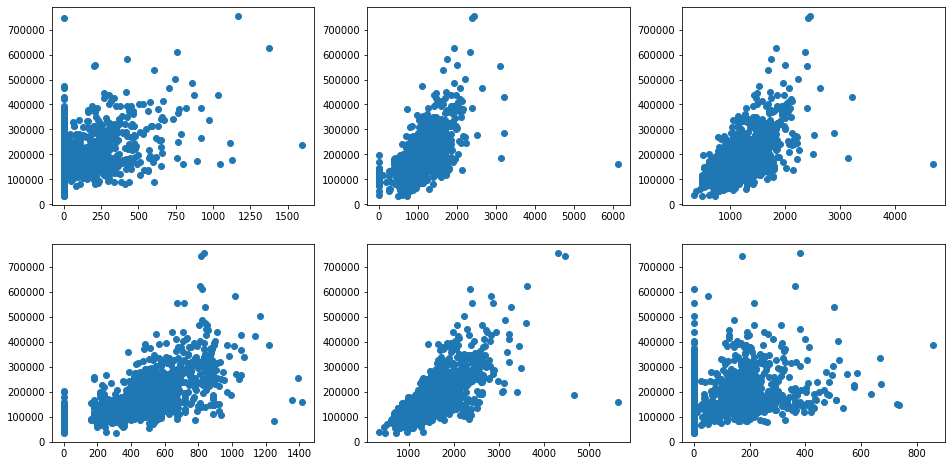

In [37]:
# Scatter plot
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(ds.MasVnrArea,ds.SalePrice)
plt.subplot(2,3,2)
plt.scatter(ds.TotalBsmtSF,ds.SalePrice)
plt.subplot(2,3,3)
plt.scatter(ds['1stFlrSF'],ds.SalePrice)
plt.subplot(2,3,4)
plt.scatter(ds['GarageArea'],ds.SalePrice)
plt.subplot(2,3,5)
plt.scatter(ds['GrLivArea'],ds.SalePrice)
plt.subplot(2,3,6)
plt.scatter(ds['WoodDeckSF'],ds.SalePrice)

**2.2 Outlier Treatmeant**

In [38]:
ds_num.describe(percentiles=[.25, .5, .75, .90, .95, .99])

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     69.863699   10516.828082   103.117123   443.639726    46.549315   
std      22.027677    9981.264932   180.731373   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7553.500000     0.000000     0.000000     0.000000   
50%      69.000000    9478.500000     0.000000   383.500000     0.000000   
75%      79.000000   11601.500000   164.250000   712.250000     0.000000   
90%      92.000000   14381.700000   335.000000  1065.500000   117.200000   
95%     104.000000   17401.150000   456.000000  1274.000000   396.200000   
99%     137.410000   37567.640000   791.280000  1572.410000   830.380000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
90%    1232.000000  1602.200000  1680.000000   954.200000      0.000000   
95%    1468.000000  1753.000000  1831.250000  1141.050000      0.000000   
99%    1797.050000  2155.050000  2219.460000  1418.920000    360.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean   1515.463699   472.980137    94.244521    46.660274      21.954110   
std     525.480383   213.804841   125.338794    66.256028      61.119149   
min     334.000000     0.000000     0.000000     0.000000       0.000000   
25%    1129.500000   334.500000     0.000000     0.000000       0.000000   
50%    1464.000000   480.000000     0.000000    25.000000       0.000000   
75%    1776.750000   576.000000   168.000000    68.000000       0.000000   
90%    2158.300000   757.100000   262.000000   130.000000     112.000000   
95%    2466.100000   850.100000   335.000000   175.050000     180.150000   
99%    3123.480000  1002.790000   505.460000   285.820000     261.050000   
max    5642.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal      SalePrice  
count  1460.000000  1460.000000  1460.000000   1460.000000    1460.000000  
mean      3.409589    15.060959     2.758904     43.489041  180921.195890  
std      29.317331    55.757415    40.177307    496.123024   79442.502883  
min       0.000000     0.000000     0.000000      0.000000   34900.000000  
25%       0.000000     0.000000     0.000000      0.000000  129975.000000  
50%       0.000000     0.000000     0.000000      0.000000  163000.000000  
75%       0.000000     0.000000     0.000000      0.000000  214000.000000  
90%       0.000000     0.000000     0.000000      0.000000  278000.000000  
95%       0.000000   160.000000     0.000000      0.000000  326100.000000  
99%     168.000000   268.050000     0.000000    700.000000  442567.010000  
max     508.000000   480.000000   738.000000  15500.000000  755000.000000

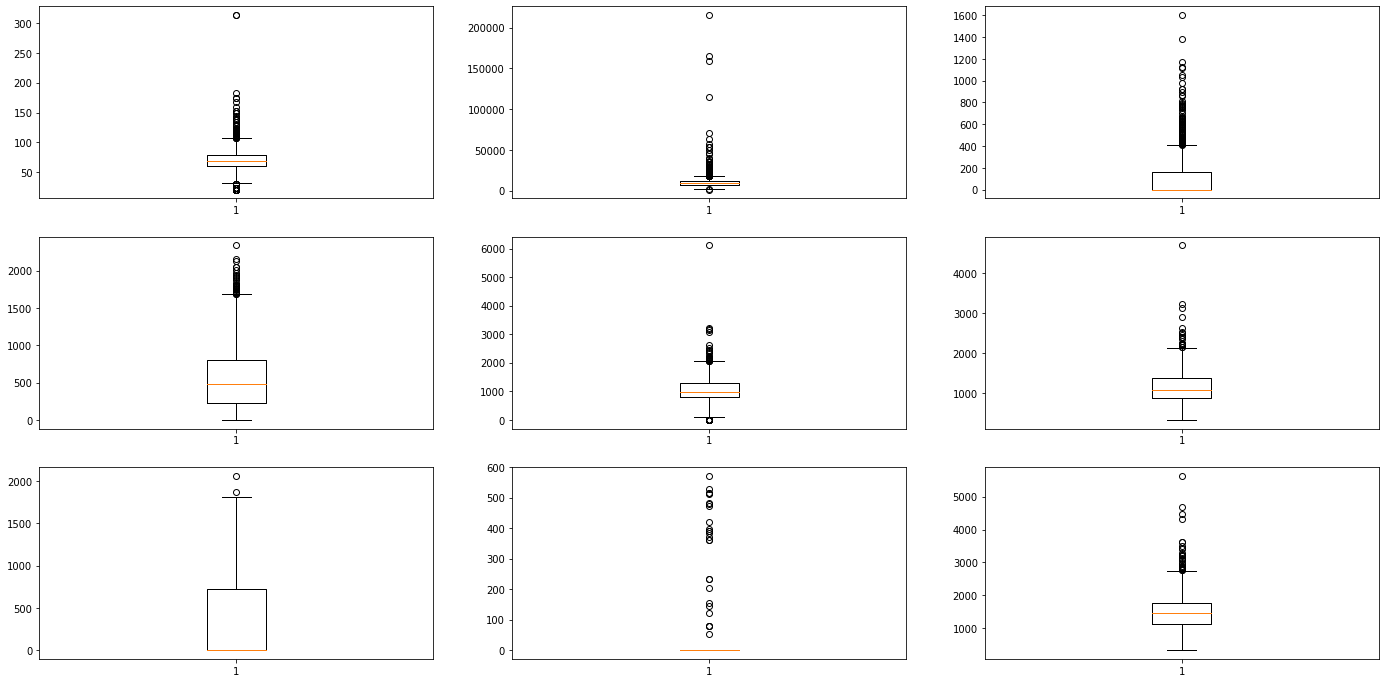

In [51]:
# outlier treatment
plt.figure(figsize=(24, 12))
plt.subplot(3,3,1)
plt.boxplot(ds.LotFrontage)
plt.subplot(3,3,2)
plt.boxplot(ds.LotArea)
plt.subplot(3,3,3)
plt.boxplot(ds.MasVnrArea)
plt.subplot(3,3,4)
plt.boxplot(ds.BsmtUnfSF)
plt.subplot(3,3,5)
plt.boxplot(ds.TotalBsmtSF)
plt.subplot(3,3,6)
plt.boxplot(ds['1stFlrSF'])
plt.subplot(3,3,7)
plt.boxplot(ds['2ndFlrSF'])
plt.subplot(3,3,8)
plt.boxplot(ds.LowQualFinSF)
plt.subplot(3,3,9)
plt.boxplot(ds.GrLivArea)
plt.show()

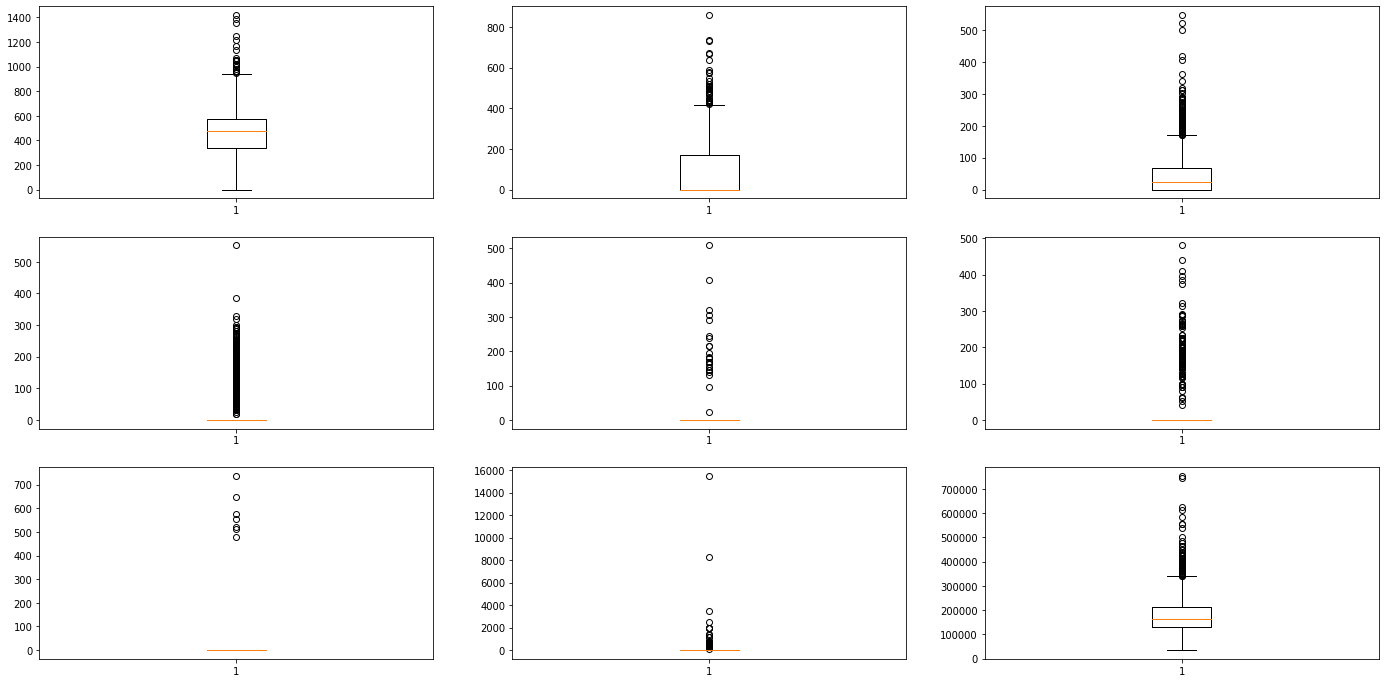

In [52]:
plt.figure(figsize=(24, 12))
plt.subplot(3,3,1)
plt.boxplot(ds.GarageArea)
plt.subplot(3,3,2)
plt.boxplot(ds.WoodDeckSF)
plt.subplot(3,3,3)
plt.boxplot(ds.OpenPorchSF)
plt.subplot(3,3,4)
plt.boxplot(ds.EnclosedPorch)
plt.subplot(3,3,5)
plt.boxplot(ds['3SsnPorch'])
plt.subplot(3,3,6)
plt.boxplot(ds.ScreenPorch)
plt.subplot(3,3,7)
plt.boxplot(ds.PoolArea)
plt.subplot(3,3,8)
plt.boxplot(ds.MiscVal)
plt.subplot(3,3,9)
plt.boxplot(ds.SalePrice)
plt.show()

Now, as per data distribution and box plot there are outlier's in data but we can't treat outlier's in all columns as we have a small data set and plus outlier's in some columns make sense. So we will do outlier treatment for few columns only

Below we have done outlier treatment for LotFrontage, LotArea, PoolArea, MiscVal

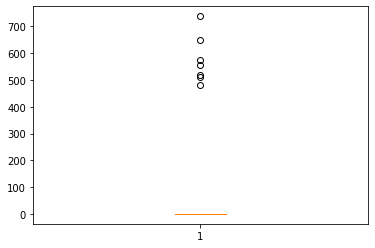

In [53]:
# outlier treatment
plt.boxplot(ds['PoolArea'])
Q1 = ds['PoolArea'].quantile(0.1)
Q3 = ds['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
ds = ds[(ds['PoolArea'] >= Q1 - 1.5*IQR) &  (ds['PoolArea'] <= Q3 + 1.5*IQR)]

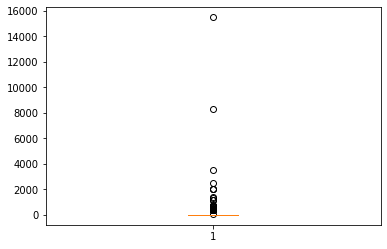

In [54]:
# outlier treatment
plt.boxplot(ds['MiscVal'])
Q1 = ds['MiscVal'].quantile(0.1)
Q3 = ds['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
ds = ds[(ds['MiscVal'] >= Q1 - 1.5*IQR) & (ds['MiscVal'] <= Q3 + 1.5*IQR)]

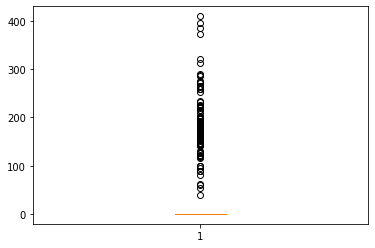

In [55]:
# outlier treatment
plt.boxplot(ds['ScreenPorch'])
Q1 = ds['ScreenPorch'].quantile(0.1)
Q3 = ds['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
ds = ds[(ds['ScreenPorch'] >= Q1 - 1.5*IQR) & (ds['ScreenPorch'] <= Q3 + 1.5*IQR)]

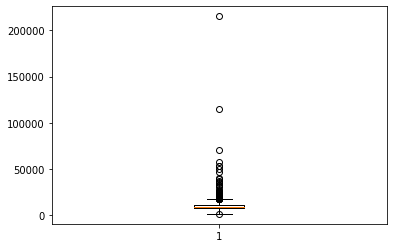

In [56]:
# outlier treatment
plt.boxplot(ds['LotArea'])
Q1 = ds['LotArea'].quantile(0.1)
Q3 = ds['LotArea'].quantile(0.9)
IQR = Q3 - Q1
ds = ds[(ds['LotArea'] >= Q1 - 1.5*IQR) & (ds['LotArea'] <= Q3 + 1.5*IQR)]

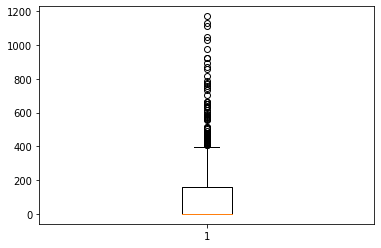

In [57]:
# outlier treatment
plt.boxplot(ds['MasVnrArea'])
Q1 = ds['MasVnrArea'].quantile(0.1)
Q3 = ds['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
ds = ds[(ds['MasVnrArea'] >= Q1 - 1.5*IQR) & (ds['MasVnrArea'] <= Q3 + 1.5*IQR)]

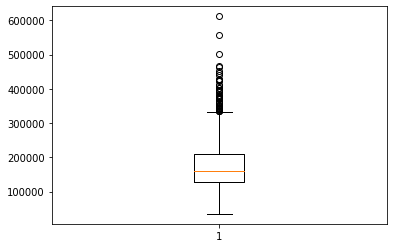

In [58]:
# outlier treatment
plt.boxplot(ds['SalePrice'])
Q1 = ds['SalePrice'].quantile(0.1)
Q3 = ds['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
ds = ds[(ds['SalePrice'] >= Q1 - 1.5*IQR) & (ds['SalePrice'] <= Q3 + 1.5*IQR)]

In [59]:
# Check number of row retained after outlier treatment
ds.shape

(1260, 77)

**2.3 Correlation between variables**

In [60]:
# correlation matrix
cor = ds_num.corr()
cor

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage       1.000000  0.304522    0.178469    0.214367    0.042463   
LotArea           0.304522  1.000000    0.103321    0.214103    0.111170   
MasVnrArea        0.178469  0.103321    1.000000    0.261256   -0.071330   
BsmtFinSF1        0.214367  0.214103    0.261256    1.000000   -0.050117   
BsmtFinSF2        0.042463  0.111170   -0.071330   -0.050117    1.000000   
BsmtUnfSF         0.124098 -0.002618    0.113862   -0.495251   -0.209294   
TotalBsmtSF       0.363472  0.260833    0.360067    0.522396    0.104810   
1stFlrSF          0.413773  0.299475    0.339850    0.445863    0.097117   
2ndFlrSF          0.072388  0.050986    0.173800   -0.137079   -0.099260   
LowQualFinSF      0.037469  0.004779   -0.068628   -0.064503    0.014807   
GrLivArea         0.368007  0.263116    0.388052    0.208171   -0.009640   
GarageArea        0.323511  0.180403    0.370884    0.296970   -0.018227   
WoodDeckSF        0.075542  0.171698    0.159991    0.204306    0.067898   
OpenPorchSF       0.137014  0.084774    0.122528    0.111761    0.003093   
EnclosedPorch     0.010287 -0.018340   -0.109907   -0.102303    0.036543   
3SsnPorch         0.061945  0.020423    0.019144    0.026451   -0.029993   
ScreenPorch       0.037655  0.043160    0.062248    0.062021    0.088871   
PoolArea          0.180819  0.077672    0.011928    0.140491    0.041709   
MiscVal          -0.000255  0.038068   -0.029512    0.003571    0.004940   
SalePrice         0.334771  0.263843    0.472614    0.386420   -0.011378   

               BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
LotFrontage     0.124098     0.363472  0.413773  0.072388      0.037469   
LotArea        -0.002618     0.260833  0.299475  0.050986      0.004779   
MasVnrArea      0.113862     0.360067  0.339850  0.173800     -0.068628   
BsmtFinSF1     -0.495251     0.522396  0.445863 -0.137079     -0.064503   
BsmtFinSF2     -0.209294     0.104810  0.097117 -0.099260      0.014807   
BsmtUnfSF       1.000000     0.415360  0.317987  0.004469      0.028167   
TotalBsmtSF     0.415360     1.000000  0.819530 -0.174512     -0.033245   
1stFlrSF        0.317987     0.819530  1.000000 -0.202646     -0.014241   
2ndFlrSF        0.004469    -0.174512 -0.202646  1.000000      0.063353   
LowQualFinSF    0.028167    -0.033245 -0.014241  0.063353      1.000000   
GrLivArea       0.240257     0.454868  0.566024  0.687501      0.134683   
GarageArea      0.183303     0.486665  0.489782  0.138347     -0.067601   
WoodDeckSF     -0.005316     0.232019  0.235459  0.092165     -0.025444   
OpenPorchSF     0.129005     0.247264  0.211671  0.208026      0.018251   
EnclosedPorch  -0.002538    -0.095478 -0.065292  0.061989      0.061081   
3SsnPorch       0.020764     0.037384  0.056104 -0.024358     -0.004296   
ScreenPorch    -0.012579     0.084489  0.088758  0.040606      0.026799   
PoolArea       -0.035092     0.126053  0.131525  0.081487      0.062157   
MiscVal        -0.023837    -0.018479 -0.021096  0.016197     -0.003793   
SalePrice       0.214479     0.613581  0.605852  0.319334     -0.025606   

               GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
LotFrontage     0.368007    0.323511    0.075542     0.137014       0.010287   
LotArea         0.263116    0.180403    0.171698     0.084774      -0.018340   
MasVnrArea      0.388052    0.370884    0.159991     0.122528      -0.109907   
BsmtFinSF1      0.208171    0.296970    0.204306     0.111761      -0.102303   
BsmtFinSF2     -0.009640   -0.018227    0.067898     0.003093       0.036543   
BsmtUnfSF       0.240257    0.183303   -0.005316     0.129005      -0.002538   
TotalBsmtSF     0.454868    0.486665    0.232019     0.247264      -0.095478   
1stFlrSF        0.566024    0.489782    0.235459     0.211671      -0.065292   
2ndFlrSF        0.687501    0.138347    0.092165     0.208026       0.061989   
LowQualFinSF    0.134683   -0.067601   -0.

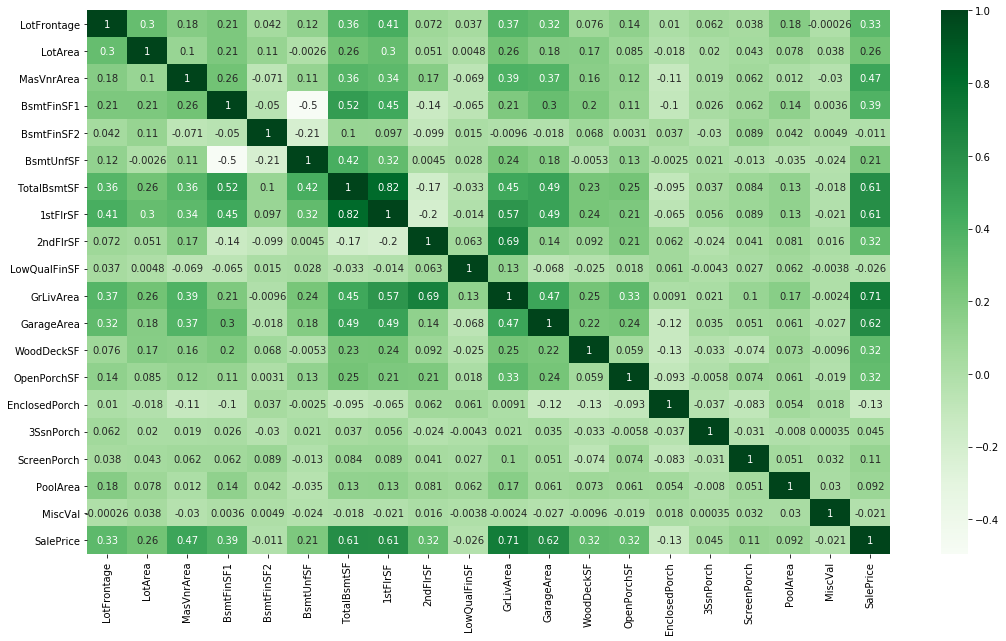

In [62]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, annot=True,cmap="Greens")
plt.show()


**2.4 Target Variable- `SalesPrice`**

In [63]:
# Checking the target variable 'Salesprice'
ds['SalePrice'].describe()

count      1260.000000
mean     175884.996825
std       70983.989942
min       34900.000000
25%      128000.000000
50%      159000.000000
75%      210000.000000
max      501837.000000
Name: SalePrice, dtype: float64

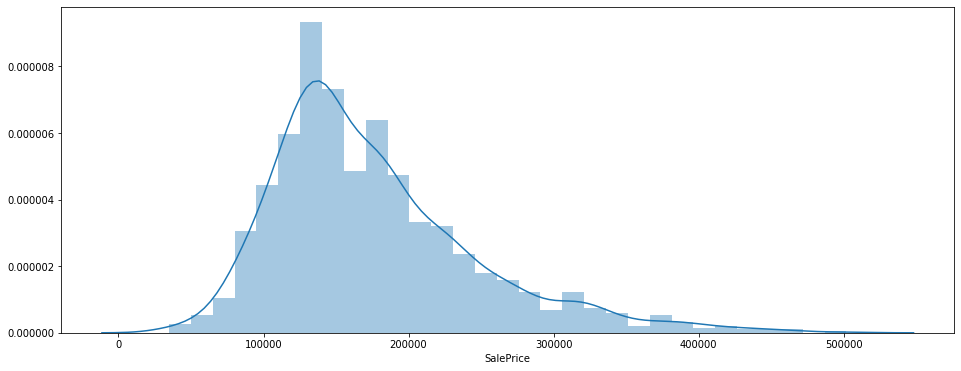

In [64]:
# positive skewness
plt.figure(figsize=(16,6))
sns.distplot(ds.SalePrice)
plt.show()

In [65]:
print('skewness %f'%ds['SalePrice'].skew())
print('Kurtosis %f'%ds['SalePrice'].kurt())

skewness 1.203540
Kurtosis 1.767884


- OverallQual Rates the overall material and finish of the ds(1-10 rating)
- GrLivArea  above (ground) living area square feet
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality

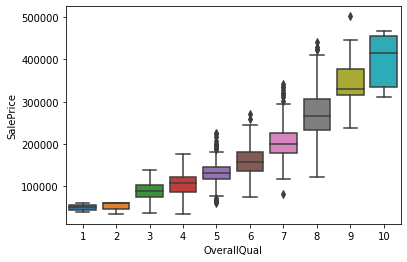

In [66]:
#SalePriceis perpostional to OverallQual
data = pd.concat([ds['SalePrice'], ds['OverallQual']], axis=1)
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)

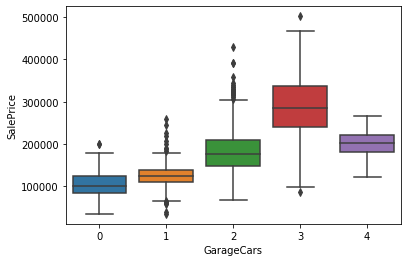

In [67]:
data = pd.concat([ds['SalePrice'], ds['GarageCars']], axis=1)
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=data)

### Step-3 Data Trasformation

**Derive columns from original columns**

In [70]:
# We can derive age using year columns
# derive ds age = 2020 - year build
ds["ds_age"] = 2020 - ds["YearBuilt"]
# derive ds age when sold in month as we have month and year both for sold ds
ds["ds_age_when_sold_in_month"] = (((ds["YrSold"]-1) - ds["YearBuilt"])*12) + ds["MoSold"]
# derive garage age = 2020 - year build
ds["garage_age"] = 2020 - ds["GarageYrBlt"]
# derive gap b/w ds build and remodel = YearRemodAdd - year build
ds["gap_between_build_remodel"] = ds["YearRemodAdd"] - ds["YearBuilt"]

In [71]:
# check data frame after deriving columns
ds.head()

MSSubClass MSZoning  LotFrontage  LotArea            Alley LotShape  \
0          60       RL         65.0     8450  No alley access      Reg   
1          20       RL         80.0     9600  No alley access      Reg   
2          60       RL         68.0    11250  No alley access      IR1   
3          70       RL         60.0     9550  No alley access      IR1   
4          60       RL         84.0    14260  No alley access      IR1   

  LandContour LotConfig LandSlope Neighborhood  ... MiscVal MoSold YrSold  \
0         Lvl    Inside       Gtl      CollgCr  ...       0      2   2008   
1         Lvl       FR2       Gtl      Veenker  ...       0      5   2007   
2         Lvl    Inside       Gtl      CollgCr  ...       0      9   2008   
3         Lvl    Corner       Gtl      Crawfor  ...       0      2   2006   
4         Lvl       FR2       Gtl      NoRidge  ...       0     12   2008   

  SaleType  SaleCondition  SalePrice  ds_age  ds_age_when_sold_in_month  \
0       WD         Normal     208500      17                         50   
1       WD         Normal     181500      44                        365   
2       WD         Normal     223500      19                         81   
3       WD        Abnorml     140000     105                       1082   
4       WD         Normal     250000      20                         96   

  garage_age gap_between_build_remodel  
0       17.0                         0  
1       44.0                         0  
2       19.0                         1  
3       22.0                        55  
4       20.0                         0  

[5 rows x 81 columns]

In [72]:
# Drop original year and month columns after deriving columns
ds = ds.drop(['GarageYrBlt','YearBuilt','YrSold','YearRemodAdd','MoSold'], axis=1)
ds.shape

(1260, 76)

#### Data preparation for model building

In [73]:
# split into X and y
X = ds.drop(['SalePrice'], axis=1)
y = ds['SalePrice']

X.shape, y.shape

((1260, 75), (1260,))

In [74]:
X.head()

MSSubClass MSZoning  LotFrontage  LotArea            Alley LotShape  \
0          60       RL         65.0     8450  No alley access      Reg   
1          20       RL         80.0     9600  No alley access      Reg   
2          60       RL         68.0    11250  No alley access      IR1   
3          70       RL         60.0     9550  No alley access      IR1   
4          60       RL         84.0    14260  No alley access      IR1   

  LandContour LotConfig LandSlope Neighborhood  ... PoolArea     Fence  \
0         Lvl    Inside       Gtl      CollgCr  ...        0  No Fence   
1         Lvl       FR2       Gtl      Veenker  ...        0  No Fence   
2         Lvl    Inside       Gtl      CollgCr  ...        0  No Fence   
3         Lvl    Corner       Gtl      Crawfor  ...        0  No Fence   
4         Lvl       FR2       Gtl      NoRidge  ...        0  No Fence   

  MiscFeature MiscVal  SaleType  SaleCondition ds_age  \
0        none       0        WD         Normal     17   
1        none       0        WD         Normal     44   
2        none       0        WD         Normal     19   
3        none       0        WD        Abnorml    105   
4        none       0        WD         Normal     20   

  ds_age_when_sold_in_month garage_age gap_between_build_remodel  
0                        50       17.0                         0  
1                       365       44.0                         0  
2                        81       19.0                         1  
3                      1082       22.0                        55  
4                        96       20.0                         0  

[5 rows x 75 columns]

In [75]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [76]:
# creating dummy variables for yes/no categorical variables
# we'll map yes to 1 and no to 0
binary_vars_list =  ['CentralAir']

# defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# applying the function to column with yes /no data
X[binary_vars_list] = X[binary_vars_list].apply(binary_map)
X.head()

MSSubClass MSZoning  LotFrontage  LotArea            Alley LotShape  \
0          60       RL         65.0     8450  No alley access      Reg   
1          20       RL         80.0     9600  No alley access      Reg   
2          60       RL         68.0    11250  No alley access      IR1   
3          70       RL         60.0     9550  No alley access      IR1   
4          60       RL         84.0    14260  No alley access      IR1   

  LandContour LotConfig LandSlope Neighborhood  ... PoolArea     Fence  \
0         Lvl    Inside       Gtl      CollgCr  ...        0  No Fence   
1         Lvl       FR2       Gtl      Veenker  ...        0  No Fence   
2         Lvl    Inside       Gtl      CollgCr  ...        0  No Fence   
3         Lvl    Corner       Gtl      Crawfor  ...        0  No Fence   
4         Lvl       FR2       Gtl      NoRidge  ...        0  No Fence   

  MiscFeature MiscVal  SaleType  SaleCondition ds_age  \
0        none       0        WD         Normal     17   
1        none       0        WD         Normal     44   
2        none       0        WD         Normal     19   
3        none       0        WD        Abnorml    105   
4        none       0        WD         Normal     20   

  ds_age_when_sold_in_month garage_age gap_between_build_remodel  
0                        50       17.0                         0  
1                       365       44.0                         0  
2                        81       19.0                         1  
3                      1082       22.0                        55  
4                        96       20.0                         0  

[5 rows x 75 columns]

In [77]:
# creating dummy variables for categorical variables

# subset all categorical variables
ds_categorical = X.select_dtypes(include=['object'])
ds_categorical.head()

MSZoning            Alley LotShape LandContour LotConfig LandSlope  \
0       RL  No alley access      Reg         Lvl    Inside       Gtl   
1       RL  No alley access      Reg         Lvl       FR2       Gtl   
2       RL  No alley access      IR1         Lvl    Inside       Gtl   
3       RL  No alley access      IR1         Lvl    Corner       Gtl   
4       RL  No alley access      IR1         Lvl       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType  ...   FireplaceQu GarageType  \
0      CollgCr       Norm       Norm     1Fam  ...  No Fireplace     Attchd   
1      Veenker      Feedr       Norm     1Fam  ...            TA     Attchd   
2      CollgCr       Norm       Norm     1Fam  ...            TA     Attchd   
3      Crawfor       Norm       Norm     1Fam  ...            Gd     Detchd   
4      NoRidge       Norm       Norm     1Fam  ...            TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive     Fence MiscFeature  \
0          RFn         TA         TA          Y  No Fence        none   
1          RFn         TA         TA          Y  No Fence        none   
2          RFn         TA         TA          Y  No Fence        none   
3          Unf         TA         TA          Y  No Fence        none   
4          RFn         TA         TA          Y  No Fence        none   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal  

[5 rows x 39 columns]

In [78]:
# convert into dummies
ds_dummies = pd.get_dummies(ds_categorical, drop_first=True)
ds_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_No alley access  \
0            0            0            1            0                      1   
1            0            0            1            0                      1   
2            0            0            1            0                      1   
3            0            0            1            0                      1   
4            0            0            1            0                      1   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  ...  \
0           0             0             0             1                0  ...   
1           0             0             0             1                0  ...   
2           0             0             0             0                0  ...   
3           0             0             0             0                0  ...   
4           0             0             0             0                0  ...   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 210 columns]

In [79]:
# drop original categorical variables after creating dummies
X = X.drop(list(ds_categorical.columns), axis=1)

In [80]:
# concat dummy variables with X
X = pd.concat([X, ds_dummies], axis=1)

In [81]:
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
0         706           0        150          856  ...               0   
1         978           0        284         1262  ...               0   
2         486           0        434          920  ...               0   
3         216           0        540          756  ...               0   
4         655           0        490         1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 246 columns]

In [82]:
X.shape

(1260, 246)

In [83]:
# Scale data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_var = X.columns
X[scale_var] = scaler.fit_transform(X[scale_var])

In [84]:
# Check data after scaling
X.describe()

MSSubClass  LotFrontage      LotArea  OverallQual  OverallCond  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000   
mean      0.220705     0.164074     0.309389     0.562963     0.568651   
std       0.252001     0.071737     0.143723     0.151362     0.137796   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.133562     0.229146     0.444444     0.500000   
50%       0.176471     0.164384     0.299810     0.555556     0.500000   
75%       0.294118     0.195205     0.377846     0.666667     0.625000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  ...  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000  ...   
mean      0.115593     0.219018     0.028626     0.267119     0.322618  ...   
std       0.188192     0.219547     0.102875     0.206981     0.126166  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.101602     0.246023  ...   
50%       0.000000     0.186450     0.000000     0.227125     0.304117  ...   
75%       0.194480     0.365678     0.000000     0.379238     0.395586  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count     1260.000000     1260.000000   1260.000000   1260.000000   
mean         0.003175        0.003968      0.084921      0.002381   
std          0.056276        0.062894      0.278874      0.048756   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1260.000000            1260.000000           1260.000000   
mean      0.865873               0.003175              0.007143   
std       0.340924               0.056276              0.084246   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1260.000000           1260.000000            1260.000000  
mean               0.015079              0.819048               0.086508  
std                0.121917              0.385132               0.281224  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 246 columns]

### Step-4: Model Building

In [85]:
# split data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

In [86]:
# let's build a Linear regression model first
from sklearn import metrics
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# rfe
rfe = RFE(lm,25)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=25, step=1, verbose=0)

In [87]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [88]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

**Lets filter the train and test set for the RFE selected columns**

In [89]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [90]:
# model coefficients
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -15119.678),
 ('MSSubClass', -11122.078),
 ('LotFrontage', -22359.652),
 ('LotArea', 38182.702),
 ('OverallQual', 63707.29),
 ('OverallCond', 39530.356),
 ('MasVnrArea', 8371.225),
 ('BsmtFinSF1', -6203966029851578.0),
 ('BsmtFinSF2', -4802860256310910.0),
 ('BsmtUnfSF', -7015304024344780.0),
 ('TotalBsmtSF', 1.0446383976875334e+16),
 ('CentralAir', 480.125),
 ('1stFlrSF', 2.2533494393779164e+16),
 ('2ndFlrSF', 1.4155457086365018e+16),
 ('LowQualFinSF', 4111155853446796.5),
 ('GrLivArea', -2.459685860038826e+16),
 ('BsmtFullBath', 7356.688),
 ('BsmtHalfBath', -10088.531),
 ('FullBath', 7477.75),
 ('HalfBath', 3849.312),
 ('BedroomAbvGr', -29317.875),
 ('KitchenAbvGr', -6220.375),
 ('TotRmsAbvGrd', 6370.375),
 ('Fireplaces', 10462.125),
 ('GarageCars', 20135.0),
 ('GarageArea', 22710.625),
 ('WoodDeckSF', 15571.0),
 ('OpenPorchSF', 11445.812),
 ('EnclosedPorch', 5435.812),
 ('3SsnPorch', 17439.401),
 ('ScreenPorch', 7614333630178816.0),
 ('PoolArea', -3010260548492434.0),


It's clearly visible that this model is overfitting and accuracy is very poor on test data set. So let's build regression model using regularization.

#### 4.1 Lasso Regression

In [91]:
# lasso regression without tuning hyper parameter
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8765642404408673
0.8059787985948845


In [92]:
# lasso model parameters without tuning hyper parameter
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -22539.511),
 ('MSSubClass', 58333.508),
 ('LotFrontage', 171348.021),
 ('LotArea', 88252.107),
 ('OverallQual', 41332.203),
 ('OverallCond', 43894.816),
 ('MasVnrArea', 48527.351),
 ('BsmtFinSF1', 89131.054),
 ('BsmtFinSF2', 84954.573),
 ('BsmtUnfSF', -2871.367),
 ('TotalBsmtSF', 23812.328),
 ('CentralAir', -95117.589),
 ('1stFlrSF', 28226.59),
 ('2ndFlrSF', 43962.554),
 ('LowQualFinSF', -39370.043),
 ('GrLivArea', -46684.058),
 ('BsmtFullBath', 82141.928),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 69204.665),
 ('HalfBath', 140.66),
 ('BedroomAbvGr', -51015.237),
 ('KitchenAbvGr', -106804.399),
 ('TotRmsAbvGrd', -107169.488),
 ('Fireplaces', 18734.336),
 ('GarageCars', 0.0),
 ('GarageArea', 40698.055)]

This model is clearly overfitting. So let's tune the alpha / hyper parameter to get balanced model.

In [94]:
# Now let's do k fold with r2 score and tune hyper parameter
# grid search CV
from sklearn.model_selection import KFold
# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [95]:
# results data frame 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.010999      0.002683         0.001804        0.000403      0.0001   
1       0.009397      0.002252         0.001402        0.000491       0.001   
2       0.006199      0.001328         0.000997        0.000006        0.01   
3       0.007400      0.002415         0.001401        0.000490        0.05   
4       0.007596      0.001621         0.001602        0.000490         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.873692           0.833876           0.866061   
1   {'alpha': 0.001}           0.873692           0.833877           0.866061   
2    {'alpha': 0.01}           0.873692           0.833877           0.866061   
3    {'alpha': 0.05}           0.873691           0.833878           0.866060   
4     {'alpha': 0.1}           0.873689           0.833880           0.866058   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.853908  ...         0.859538        0.014462               26   
1           0.853908  ...         0.859539        0.014462               25   
2           0.853910  ...         0.859539        0.014463               24   
3           0.853916  ...         0.859544        0.014463               23   
4           0.853924  ...         0.859549        0.014464               22   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.873512            0.882952            0.878292   
1            0.873512            0.882952            0.878292   
2            0.873512            0.882952            0.878292   
3            0.873512            0.882952            0.878292   
4            0.873512            0.882952            0.878292   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.876606            0.874511          0.877174          0.00333  
1            0.876606            0.874511          0.877174          0.00333  
2            0.876606            0.874511          0.877174          0.00333  
3            0.876606            0.874511          0.877174          0.00333  
4            0.876606            0.874511          0.877174          0.00333  

[5 rows x 21 columns]

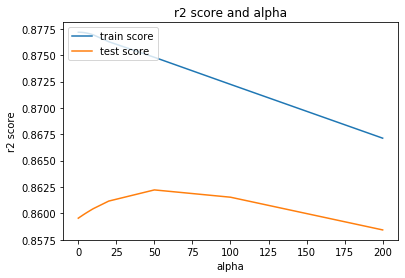

In [96]:
# plot to choose optimal value of aplha / hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [97]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 50}
0.8622209064840327


From both the plots we have seen that optimal value for alpha is 20. So let's use this value of alpha for regularization.

In [98]:
# model with optimal alpha = 20
# lasso regression
lm = Lasso(alpha=20)
lm.fit(X_train, y_train)


# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8753500604392731
0.8094247772663667


In [99]:
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -19738.687),
 ('MSSubClass', 57487.591),
 ('LotFrontage', 170964.54),
 ('LotArea', 49007.841),
 ('OverallQual', 6854.382),
 ('OverallCond', -0.0),
 ('MasVnrArea', 100182.443),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 21450.71),
 ('BsmtUnfSF', -17945.187),
 ('TotalBsmtSF', 132988.898),
 ('CentralAir', -90307.724),
 ('1stFlrSF', 23581.573),
 ('2ndFlrSF', 43573.682),
 ('LowQualFinSF', -40637.314),
 ('GrLivArea', -2008.786),
 ('BsmtFullBath', 27943.908),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -2139.876),
 ('KitchenAbvGr', -17255.904),
 ('TotRmsAbvGrd', -85666.604),
 ('Fireplaces', 18336.062),
 ('GarageCars', 0.0),
 ('GarageArea', 19615.924)]

With optimal value of alpha = 20, we got following score for train and test data set.

- **R2 for train :0.8976719625770752**
- **R2 for test : 0.8499401098545847**

This score looks good and we can conclude that model is not overfitting.

In [100]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
score = sqrt(mean_squared_error(y_train, y_train_pred))
score
#print(rmse.mean())
#print(rmse.std())

25579.730709479438

**From the R square value we see that the model**

built using lasso regression can have morethan 80% accuracy in its prediction capability.
R-squared (R2) explains the proportion of variation in the outcome (Sale Price) that is explained by the predictor variables. 

In [101]:
#AIC and BIC Calculation
n= 1016 # n is equal to total datapoints on which model is built
k= 100 # k is equal to number of predictor variables in model built
resid=np.subtract(y_test_pred,y_test)
rss=np.sum(np.power(resid,2))
print("RSS:{}".format(rss))
aic=n*np.log(rss/n)+2*k
print("AIC:{}".format(aic))
bic=n*np.log(rss/n)+k*np.log(n)
print("BIC:{}".format(bic))

RSS:197563203972.03403
AIC:19591.066894258252
BIC:20083.429757072096


In [102]:
#Predictor Variables from the Model built using Lasso Regression:
print(list(zip(cols, model_parameters)))

[('constant', -19738.687), ('MSSubClass', 57487.591), ('LotFrontage', 170964.54), ('LotArea', 49007.841), ('OverallQual', 6854.382), ('OverallCond', -0.0), ('MasVnrArea', 100182.443), ('BsmtFinSF1', 0.0), ('BsmtFinSF2', 21450.71), ('BsmtUnfSF', -17945.187), ('TotalBsmtSF', 132988.898), ('CentralAir', -90307.724), ('1stFlrSF', 23581.573), ('2ndFlrSF', 43573.682), ('LowQualFinSF', -40637.314), ('GrLivArea', -2008.786), ('BsmtFullBath', 27943.908), ('BsmtHalfBath', 0.0), ('FullBath', 0.0), ('HalfBath', 0.0), ('BedroomAbvGr', -2139.876), ('KitchenAbvGr', -17255.904), ('TotRmsAbvGrd', -85666.604), ('Fireplaces', 18336.062), ('GarageCars', 0.0), ('GarageArea', 19615.924)]


#### 4.2 Ridge Regression

Based on the predictor variables having high coefficients in Lasso Regression model, we will shortlist these and perform Ridge regression to further regularize the regression model

In [103]:
# ridge regression without tuning hyper parameter
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8765642178357452
0.8060225499378741


As we can see the above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score

In [104]:
ridge.fit(X_train, y_train)
ridge.coef_

array([  58329.9265607 ,  171332.97148356,   72809.48415022,
         29367.16205674,   26434.18190989,   74494.46300036,
         44871.14710539,   57130.99213486,  -10949.77468575,
         72155.67028026,  -95107.70771614,   28219.8470012 ,
         43967.13968685,  -39376.38007228,  -46466.63823396,
         27389.81062771,   27389.81062453,   68805.88589397,
         27389.81063075,  -50916.99985125, -106299.18581713,
       -107059.80715476,    9368.73597301,    9368.73597321,
         40654.81111347])

In [105]:
# Now let's do k fold with r2 score and tune hyper parameter

# list of alphas to tune
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [106]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003600      0.000489         0.001400    4.900183e-04       0.001   
1       0.002400      0.000490         0.001800    3.998998e-04        0.01   
2       0.003401      0.000491         0.001799    4.016176e-04           1   
3       0.003200      0.000748         0.001400    4.902716e-04           5   
4       0.002800      0.000400         0.001000    5.519789e-07          10   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.868522           0.821676           0.882857   
1   {'alpha': 0.01}           0.868495           0.822080           0.882866   
2    {'alpha': 1.0}           0.866024           0.833901           0.880897   
3    {'alpha': 5.0}           0.853367           0.837264           0.865596   
4   {'alpha': 10.0}           0.835931           0.830835           0.848716   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.876918  ...         0.860718        0.021855                3   
1           0.876906  ...         0.860823        0.021699                2   
2           0.873636  ...         0.863437        0.016053                1   
3           0.856880  ...         0.856085        0.010760                4   
4           0.837823  ...         0.842765        0.010621                5   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.874947            0.884263            0.871285   
1            0.874945            0.884262            0.871284   
2            0.873066            0.882040            0.869367   
3            0.862374            0.869966            0.858347   
4            0.847417            0.854356            0.844037   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.875690            0.878959          0.877029         0.004363  
1            0.875687            0.878958          0.877027         0.004363  
2            0.873048            0.876676          0.874839         0.004278  
3            0.861837            0.864010          0.863307         0.003807  
4            0.847760            0.848166          0.848347         0.003345  

[5 rows x 21 columns]

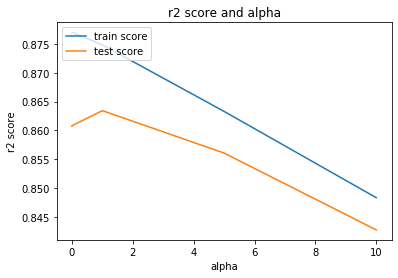

In [107]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From both the plots we have seen that optimal value for alpha is between 1 to 5. So let's use alpha = 4.

In [108]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 1.0}
0.8634371422373167


In [109]:
# ridge regression without tuning hyper parameter
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8745580598489816
0.8106920814675513


In [110]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -17001.97),
 ('MSSubClass', 54619.151),
 ('LotFrontage', 160794.361),
 ('LotArea', 68848.753),
 ('OverallQual', 20614.166),
 ('OverallCond', 22673.288),
 ('MasVnrArea', 65592.294),
 ('BsmtFinSF1', 51413.398),
 ('BsmtFinSF2', 52232.242),
 ('BsmtUnfSF', -10265.106),
 ('TotalBsmtSF', 75444.323),
 ('CentralAir', -79966.141),
 ('1stFlrSF', 25048.385),
 ('2ndFlrSF', 47063.348),
 ('LowQualFinSF', -43262.924),
 ('GrLivArea', -11542.694),
 ('BsmtFullBath', 12695.118),
 ('BsmtHalfBath', 12695.118),
 ('FullBath', 5675.151),
 ('HalfBath', 12695.118),
 ('BedroomAbvGr', -14098.132),
 ('KitchenAbvGr', -21077.152),
 ('TotRmsAbvGrd', -51816.588),
 ('Fireplaces', 9250.761),
 ('GarageCars', 9250.761),
 ('GarageArea', 18673.49)]

In [111]:
# coefficients for optimal value of alpha = 1
ridge.fit(X_train, y_train)
ridge.coef_

array([ 54619.15056594, 160794.36108721,  68848.75329539,  20614.16584389,
        22673.28814737,  65592.29448211,  51413.39818352,  52232.24243803,
       -10265.10629118,  75444.32256212, -79966.14134795,  25048.38517574,
        47063.3482495 , -43262.9242338 , -11542.69421743,  12695.11760587,
        12695.11760587,   5675.15136793,  12695.11760587, -14098.13156007,
       -21077.15170378, -51816.58828933,   9250.761271  ,   9250.76127101,
        18673.48965286])

With optimal value of alpha = 4 for ridge regression, we got following score for train and test data set.

- **R2 for train : 0.8967352030657629**
- **R2 for test  : 0.8481301197213559**

This score looks good and we can conclude that model is not overfitting.

In [112]:
#Check R2
r_square_score=r2_score(y_test,y_test_pred)
print("R Square score:{}".format(r_square_score))

R Square score:0.8106920814675513


**From the R square value we see that the model**

built using lasso regression can have 80% accuracy in its prediction capability.
R-squared (R2) explains the proportion of variation in the outcome (Sale Price) that is explained by the predictor variables. 

In [113]:
#AIC and BIC Calculation
n= 1016 # n is equal to total datapoints on which model is built
k= 100 # k is equal to number of predictor variables in model built
resid=np.subtract(y_test_pred,y_test)
rss=np.sum(np.power(resid,2))
print("RSS:{}".format(rss))
aic=n*np.log(rss/n)+2*k
print("AIC:{}".format(aic))
bic=n*np.log(rss/n)+k*np.log(n)
print("BIC:{}".format(bic))

RSS:196249430466.7385
AIC:19584.288042000153
BIC:20076.650904813996


In [114]:
#Predictor Variables from the Model built using Lasso Regression:
print(list(zip(cols, model_parameters)))

[('constant', -17001.97), ('MSSubClass', 54619.151), ('LotFrontage', 160794.361), ('LotArea', 68848.753), ('OverallQual', 20614.166), ('OverallCond', 22673.288), ('MasVnrArea', 65592.294), ('BsmtFinSF1', 51413.398), ('BsmtFinSF2', 52232.242), ('BsmtUnfSF', -10265.106), ('TotalBsmtSF', 75444.323), ('CentralAir', -79966.141), ('1stFlrSF', 25048.385), ('2ndFlrSF', 47063.348), ('LowQualFinSF', -43262.924), ('GrLivArea', -11542.694), ('BsmtFullBath', 12695.118), ('BsmtHalfBath', 12695.118), ('FullBath', 5675.151), ('HalfBath', 12695.118), ('BedroomAbvGr', -14098.132), ('KitchenAbvGr', -21077.152), ('TotRmsAbvGrd', -51816.588), ('Fireplaces', 9250.761), ('GarageCars', 9250.761), ('GarageArea', 18673.49)]


### Step-5: Conclusion

As Alpha parameter in scikit learn is nothing but theory lambda parameter,
 - so we have from Lasso Rigression, alpha = 20 and from Ridge Regression, alpha = 1.0. 
 - These are the optimal values of lambda or the hyerparameters for regularization of the regression model.

**Based on both the Ridge and Lasso Models, the key predictor variables for predicting the Sale Price of Houses in Australia are as follows:**
` 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndslrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea' `